# This notebook serves to demonstrate data analysis pipeline for vortex line experiment, screenshot of raw data overlaid with particle and line tracking below:

![title](muvi_screenshot_00000000.png)

In [1]:
import muvi #https://github.com/klecknerlab/muvi
from vtianalysis import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [4]:
import sys
import pandas as pd
import numpy as np
import muvi
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit


#The windowed_polynomial_resample function resamples irregularly spaced data and computes spatial derivatives using a polynomial fit within a specified cutoff radius, with options for different weighting functions and parallel processing. It’s ideal for interpolating data and calculating derivatives in noisy, non-uniform datasets.
from muvi.geometry.resample import windowed_polynomial_resample

#Specifies the correct path to the dataset being analyzed
dir_path = r"E:\2024_09_03\1400_downstream_offset_down"

#This initialization creates a set of directories associated with the analysis pipeline to keep everything organized, eg. vortex_path, tracks_path, vol_path, figures_path
muvi = VTIAnalysis(dir_path)

In [ ]:
muvi.get_muvi_info(y_min_start=-25.5,z_min_start=-25.5,y_max_start=24.5,z_max_start=24.5,frame_type='downstream',
                   y_min_finish=-24,z_min_finish=-25.7,y_max_finish=26,z_max_finish=24.3,cart_velocity=20, x_start=(126-144.6))

In [ ]:
muvi.get_muvi_vortex_info(int_min_x1=-150, int_min_y1=10.4, int_min_z1=-12.4, int_max_x1=150, int_max_y1=16, int_max_z1=3.5,
int_min_x2=-150,  int_min_y2=-19.2, int_min_z2=-14.4, int_max_x2=150, int_max_y2=-5, int_max_z2=4)

In [ ]:
muvi.track_particles(batch=8)

In [ ]:
muvi.track_vortex_core()

In [ ]:
muvi.filter_tracked_particles()


In [ ]:
muvi.link(search_range=(3,3,11), memory=3, adaptive_stop=(1,1,3))

In [ ]:
muvi.traj()

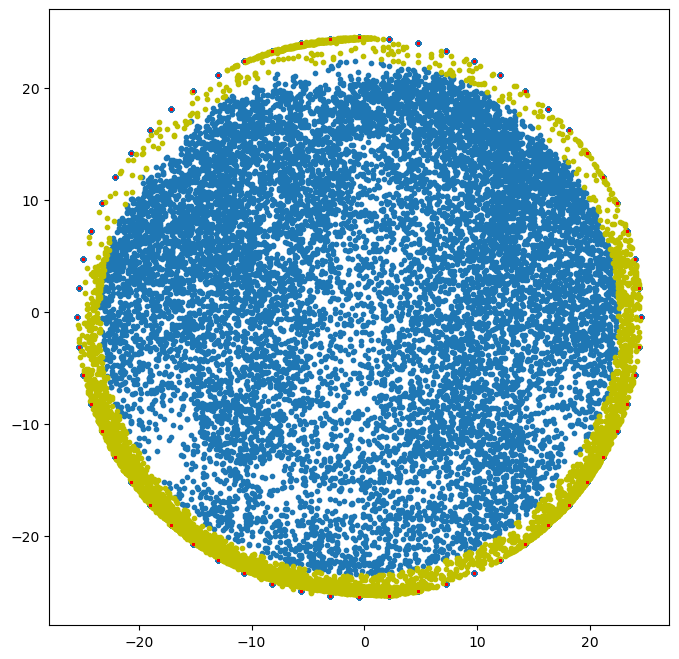

In [5]:
muvi.scatter_traj(frame=35)

In [ ]:
muvi.resample_muvi(start_frame=1173)

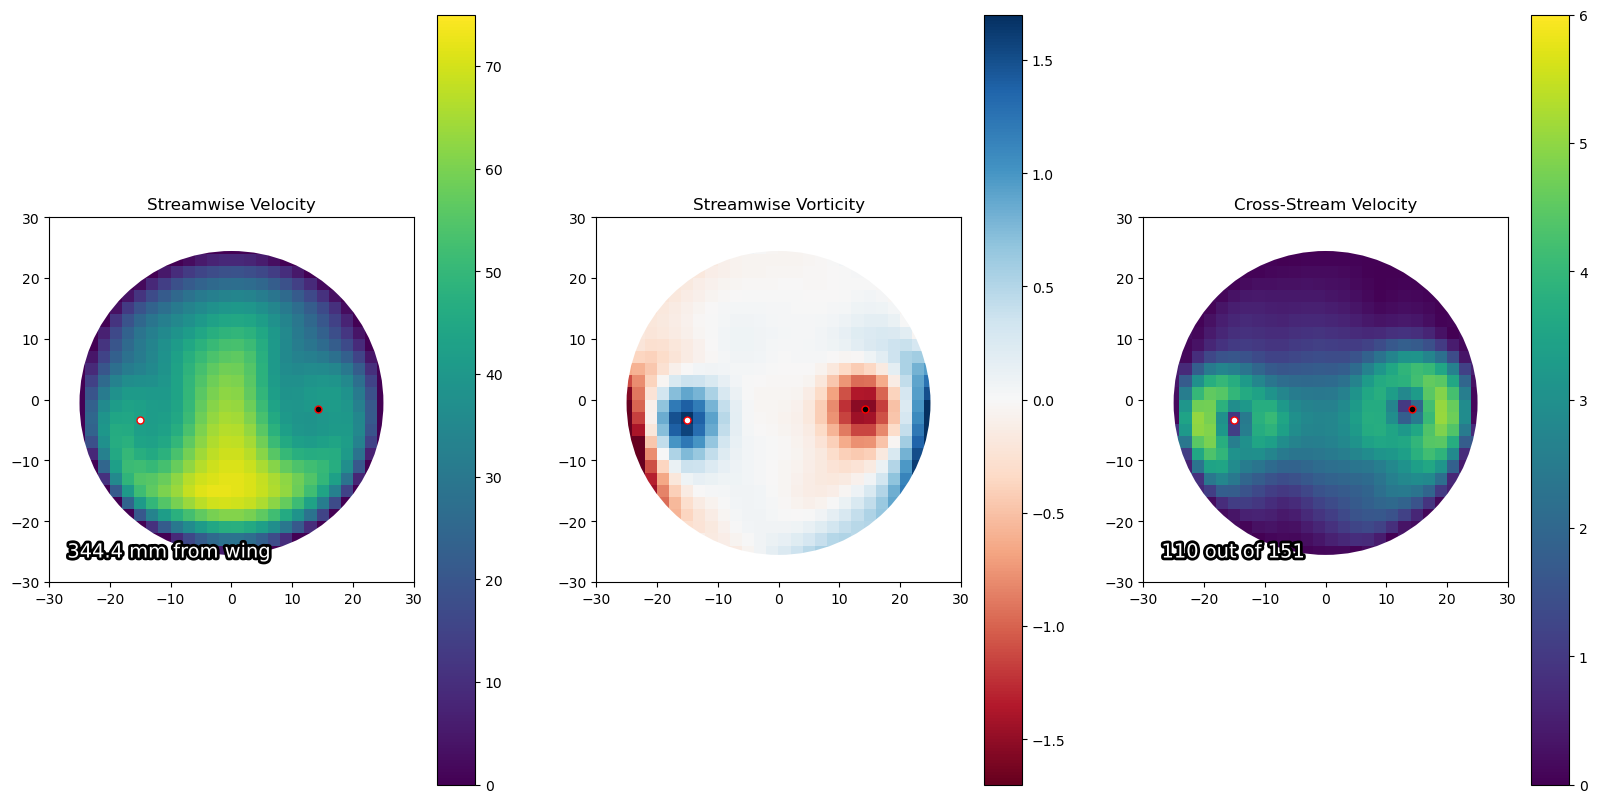

In [13]:
muvi.view_volume_slice(frame=500, x_plane=110,streamwise_max=75,vorticity_range=1.7,crosswise_max=6.0,show_d=False,com_rad=20)